In [ ]:
# Gerekli kütüphaneleri yükleyin
!pip install transformers datasets torch pandas sklearn
!pip install datasets


  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
# Gerekli kütüphaneleri yükleyin
!pip install transformers datasets torch pandas sklearn matplotlib

# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os
os.environ["WANDB_DISABLED"] = "true"  # wandb'yi devre dışı bırak


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Eğitim ve test veri yolları
train_path = "/content/drive/MyDrive/30_data_set/30_train/sorted_final_merged_train.xlsx"
test_path = "/content/drive/MyDrive/30_data_set/30_test/sorted_final_merged_test.xlsx"

# Veriyi yükleme
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

# Eksik değerleri temizleme
train_df = train_df.dropna(subset=['poem_text'])
test_df = test_df.dropna(subset=['poem_text'])

# Dataset'e dönüştürme
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Model ve Tokenizer Yükleme
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Tokenizer ile işlem
def tokenize_function(examples):
    return tokenizer(examples['poem_text'], truncation=True, padding=True, max_length=512)

# Dataset.map ile tokenize işlemi
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/11482 [00:00<?, ? examples/s]

Map:   0%|          | 0/4916 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/11482 [00:00<?, ? examples/s]

Map:   0%|          | 0/4916 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-5-bd411bb8bd64>:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Specificity,Auc
1,0.994300,0.806547,0.725386,0.727707,0.725386,0.723949,0.931346,0.913755
2,0.573100,0.674242,0.768104,0.774758,0.768104,0.769912,0.942022,0.944632
3,0.591900,0.618102,0.789870,0.800406,0.789870,0.792290,0.947464,0.953065
4,0.438200,0.648312,0.788242,0.788432,0.788242,0.786914,0.947058,0.954448
5,0.475000,0.638981,0.797193,0.802486,0.797193,0.797140,0.949296,0.956180
6,0.429100,0.625895,0.802482,0.805755,0.802482,0.802787,0.950619,0.958928


Eğitim Zamanı: 1612.81 saniye


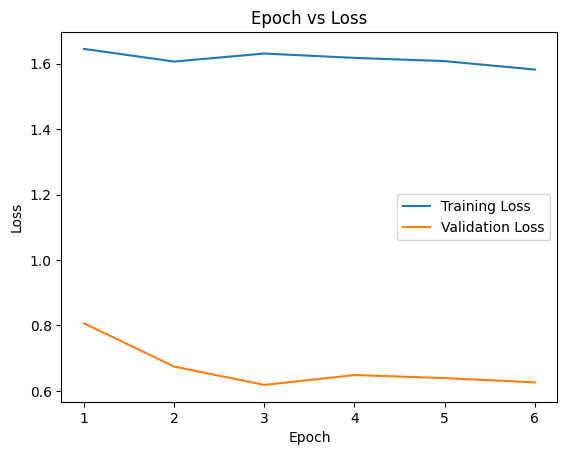

Starting inference...
Ortalama Çıkarım Süre: 0.009125 saniye


In [ ]:

import pandas as pd
import os
import time
import numpy as np
import torch
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["WANDB_DISABLED"] = "true"

# Eğitim ve test veri yolları
train_path = "/content/drive/MyDrive/30_data_set/30_train/sorted_final_merged_train.xlsx"
test_path = "/content/drive/MyDrive/30_data_set/30_test/sorted_final_merged_test.xlsx"

# Veriyi yükleme
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

# Eksik değerleri temizleme
train_df = train_df.dropna(subset=['poem_text'])
test_df = test_df.dropna(subset=['poem_text'])

# Dataset'e dönüştürme
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Model ve Tokenizer Yükleme
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Tokenizer ile işlem
def tokenize_function(examples):
    return tokenizer(examples['poem_text'], truncation=True, padding=True, max_length=512)

# Dataset.map ile tokenize işlemi
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Performans Metriklerini Hesaplama Fonksiyonu
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    true_labels = p.label_ids
    accuracy = np.mean(preds == true_labels)
    precision = classification_report(true_labels, preds, output_dict=True)['weighted avg']['precision']
    recall = classification_report(true_labels, preds, output_dict=True)['weighted avg']['recall']
    f1 = classification_report(true_labels, preds, output_dict=True)['weighted avg']['f1-score']
    cm = confusion_matrix(true_labels, preds)
    specificity_per_class = []
    for i in range(len(cm)):
        tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_per_class.append(specificity)
    specificity = np.mean(specificity_per_class)
    probabilities = softmax(p.predictions, axis=1)
    auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'auc': auc
    }

# Eğitim Argümanları
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,  # Optimize edilmiş düşük öğrenme oranı
    per_device_train_batch_size=32,  # Daha büyük batch boyutu
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False
)

# Eğitim Zamanını Hesaplama
start_time = time.time()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()
training_time = time.time() - start_time
print(f"Eğitim Zamanı: {training_time:.2f} saniye")

# Eğitim ve Test Kümesi Kayıplarını Gruplama
metrics = trainer.state.log_history
training_loss = [x['loss'] for x in metrics if 'loss' in x and 'epoch' in x]
validation_loss = [x['eval_loss'] for x in metrics if 'eval_loss' in x and 'epoch' in x]

# Grafik Hazırlama
epochs = range(1, len(validation_loss) + 1)

plt.plot(epochs, training_loss[:len(epochs)], label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/epoch_loss_graph_updated.png")
plt.show()

# Çıkarım Süresini Hesaplama
def measure_inference_time(model, test_dataset):
    print("Starting inference...")
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inference_times = []
    for i in range(len(test_dataset)):
        input_data = {
            "input_ids": torch.tensor(test_dataset[i]["input_ids"]).unsqueeze(0).to(device),
            "attention_mask": torch.tensor(test_dataset[i]["attention_mask"]).unsqueeze(0).to(device)
        }
        start_time = time.time()
        with torch.no_grad():
            _ = model(**input_data)
        inference_times.append(time.time() - start_time)
    avg_inference_time = sum(inference_times) / len(inference_times)
    print(f"Ortalama Çıkarım Süre: {avg_inference_time:.6f} saniye")
    return avg_inference_time

inference_time = measure_inference_time(model, test_dataset)


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_sensitivity(true_labels, predictions, num_classes):
    # Karışıklık matrisi (Confusion Matrix) hesapla
    cm = confusion_matrix(true_labels, predictions, labels=list(range(num_classes)))

    sensitivities = []
    for i in range(num_classes):
        # True Positives (TP): Doğru Pozitif
        tp = cm[i, i]
        # False Negatives (FN): Yanlış Negatif
        fn = sum(cm[i, :]) - tp

        # Sensitivity = TP / (TP + FN)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        sensitivities.append(sensitivity)

    return sensitivities

# Sınıf sayısını belirle
num_classes = len(set(true_labels))

# Sensitivity değerlerini hesapla
sensitivities = calculate_sensitivity(true_labels, predictions, num_classes)

# Her sınıf için Sensitivity değerlerini yazdır
for i, sensitivity in enumerate(sensitivities):
    print(f"Class {i} Sensitivity: {sensitivity:.2f}")


Class 0 Sensitivity: 0.88
Class 1 Sensitivity: 0.81
Class 2 Sensitivity: 0.82
Class 3 Sensitivity: 0.76
Class 4 Sensitivity: 0.72


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Modeli ve tokenizer'ı yükleme
model_path = '/content/drive/MyDrive/best_roberta_base_model'
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Cihaz ayarı (GPU varsa kullanılır, yoksa CPU kullanılır)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Modeli doğru cihaza yerleştirin
model.eval()  # Test moduna alın

def measure_inference_time(model, test_dataset):
    print("Starting inference...")
    model.eval()
    inference_times = []

    # Modelin ve verilerin aynı cihazda olduğundan emin olun
    for i in range(len(test_dataset)):
        input_data = {
            "input_ids": torch.tensor(test_dataset[i]["input_ids"]).unsqueeze(0).to(device),
            "attention_mask": torch.tensor(test_dataset[i]["attention_mask"]).unsqueeze(0).to(device)
        }

        start_time = time.time()
        with torch.no_grad():
            _ = model(**input_data)
        inference_times.append(time.time() - start_time)

        if i % 200 == 0:
            print(f"Inference {i}/{len(test_dataset)} completed.")

    avg_inference_time = sum(inference_times) / len(inference_times)
    print(f"Average Inference Time per Sample: {avg_inference_time:.6f} seconds")

    return {
        'avg_inference_time': avg_inference_time
    }

# Çıkarım süresini ölçme
inference_results = measure_inference_time(model, test_dataset)
print(inference_results)



Starting inference...
Inference 0/4916 completed.
Inference 200/4916 completed.
Inference 400/4916 completed.
Inference 600/4916 completed.
Inference 800/4916 completed.
Inference 1000/4916 completed.
Inference 1200/4916 completed.
Inference 1400/4916 completed.
Inference 1600/4916 completed.
Inference 1800/4916 completed.
Inference 2000/4916 completed.
Inference 2200/4916 completed.
Inference 2400/4916 completed.
Inference 2600/4916 completed.
Inference 2800/4916 completed.
Inference 3000/4916 completed.
Inference 3200/4916 completed.
Inference 3400/4916 completed.
Inference 3600/4916 completed.
Inference 3800/4916 completed.
Inference 4000/4916 completed.
Inference 4200/4916 completed.
Inference 4400/4916 completed.
Inference 4600/4916 completed.
Inference 4800/4916 completed.
Average Inference Time per Sample: 0.009206 seconds
{'avg_inference_time': 0.009206123522765468}


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Model ve tokenizer'ı kaydedilen modelden yükleme
model_path = '/content/drive/MyDrive/best_roberta_base_model'
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Cihaz ayarı
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Modeli doğru cihaza taşıma
model.eval()  # Test moduna alma


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

Processed 16/4916 samples
Processed 32/4916 samples
Processed 48/4916 samples
Processed 64/4916 samples
Processed 80/4916 samples
Processed 96/4916 samples
Processed 112/4916 samples
Processed 128/4916 samples
Processed 144/4916 samples
Processed 160/4916 samples
Processed 176/4916 samples
Processed 192/4916 samples
Processed 208/4916 samples
Processed 224/4916 samples
Processed 240/4916 samples
Processed 256/4916 samples
Processed 272/4916 samples
Processed 288/4916 samples
Processed 304/4916 samples
Processed 320/4916 samples
Processed 336/4916 samples
Processed 352/4916 samples
Processed 368/4916 samples
Processed 384/4916 samples
Processed 400/4916 samples
Processed 416/4916 samples
Processed 432/4916 samples
Processed 448/4916 samples
Processed 464/4916 samples
Processed 480/4916 samples
Processed 496/4916 samples
Processed 512/4916 samples
Processed 528/4916 samples
Processed 544/4916 samples
Processed 560/4916 samples
Processed 576/4916 samples
Processed 592/4916 samples
Process

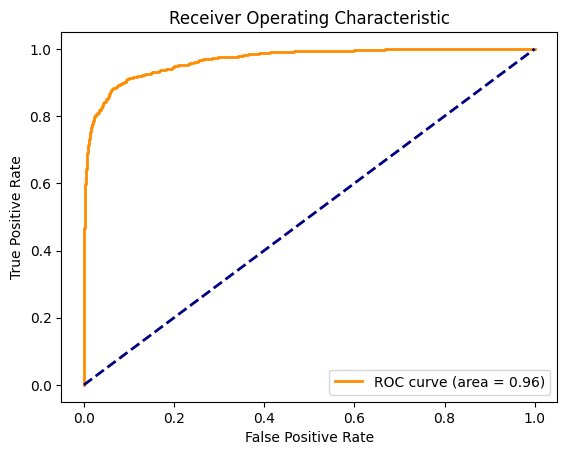

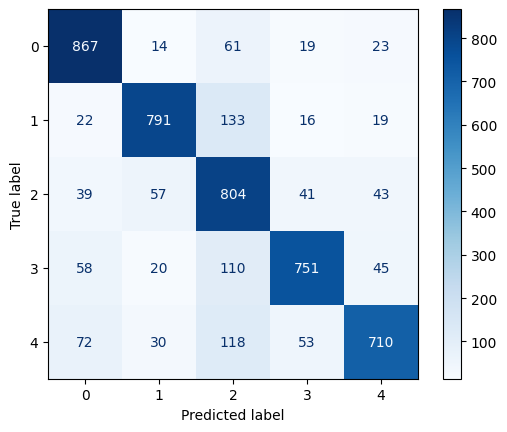

In [ ]:
# test_texts değişkenini test_dataset'ten al
test_texts = [example['poem_text'] for example in test_dataset]

# Tahminler ve olasılıkları hesapla
predictions, probabilities = predict_in_batches(model, tokenizer, test_texts, batch_size=16)

# Performans metriği örnekleri
from sklearn.metrics import classification_report

true_labels = [example['label'] for example in test_dataset]
print("Classification Report:")
print(classification_report(true_labels, predictions))

# ROC eğrisi
fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(true_labels, probabilities, multi_class='ovr'))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Karışıklık matrisi
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.config.id2label)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Processed 16/4916 samples
Processed 32/4916 samples
Processed 48/4916 samples
Processed 64/4916 samples
Processed 80/4916 samples
Processed 96/4916 samples
Processed 112/4916 samples
Processed 128/4916 samples
Processed 144/4916 samples
Processed 160/4916 samples
Processed 176/4916 samples
Processed 192/4916 samples
Processed 208/4916 samples
Processed 224/4916 samples
Processed 240/4916 samples
Processed 256/4916 samples
Processed 272/4916 samples
Processed 288/4916 samples
Processed 304/4916 samples
Processed 320/4916 samples
Processed 336/4916 samples
Processed 352/4916 samples
Processed 368/4916 samples
Processed 384/4916 samples
Processed 400/4916 samples
Processed 416/4916 samples
Processed 432/4916 samples
Processed 448/4916 samples
Processed 464/4916 samples
Processed 480/4916 samples
Processed 496/4916 samples
Processed 512/4916 samples
Processed 528/4916 samples
Processed 544/4916 samples
Processed 560/4916 samples
Processed 576/4916 samples
Processed 592/4916 samples
Process

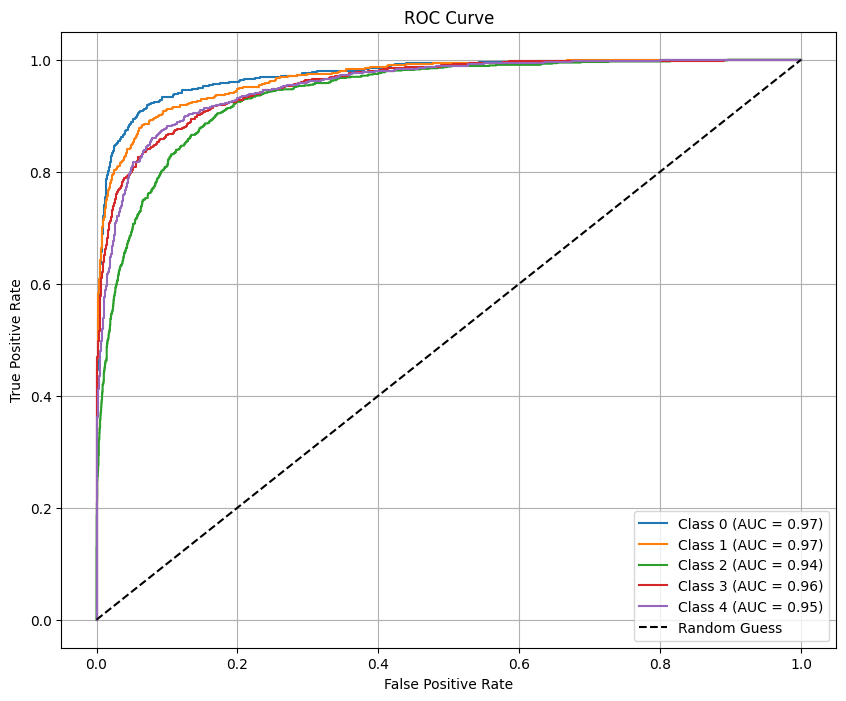

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model ve tokenizer'dan test veri kümesi üzerinde tahmin yapma
test_texts = [example['poem_text'] for example in test_dataset]
true_labels = [example['label'] for example in test_dataset]

# Tahmin ve olasılık hesaplama
predictions, probabilities = predict_in_batches(model, tokenizer, test_texts, batch_size=16)

# Sınıf sayısını belirleme
num_classes = probabilities.shape[1]  # Sınıf sayısı

# ROC Eğrisi Çizimi
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    # Her sınıf için binary etiketler oluştur
    true_binary = (np.array(true_labels) == i).astype(int)

    # ROC eğrisi için FPR ve TPR hesaplama
    fpr, tpr, _ = roc_curve(true_binary, probabilities[:, i])
    auc = roc_auc_score(true_binary, probabilities[:, i])

    # Eğriyi çizme
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

# Rastgele Tahmin Çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Grafik detayları
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


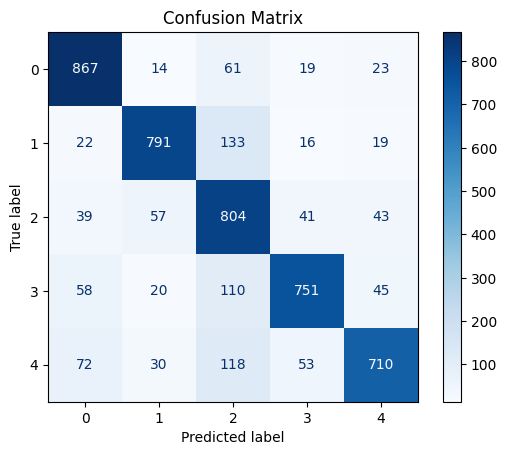

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
